# <b>Prise en main de 2 librairies de deep-learning : Keras et Pytorch</b>

Pour cette prise en main, nous allons nous limiter au perceptron multicouche (MLP).  
On va reprendre les exemples déjà utilisés :
- Iris
- MNIST
- GTSRB

## <b>I) Prise en main de Keras</b>

Keras est une sur-couche de Tensorflow et facilite son utilisation.  
Keras et Tensorflow sont principalement dédiées à la programmation de réseaux de neurones convolutifs.  

Pour le chargement des données et la séparation en sous-ensembles d'apprentissage et de test, on peut utiliser les fonctions déjà utilisées avec les algorithmes de Machine Learning.

### <b>I.1) MLP avec Iris (en Keras)</b>

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt

#chargement des données
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

#codage des labels au format des sorties, avec une sortie à 1 et les autres à 0
def one_hot_encode_object_array(arr):    
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))
y_train = one_hot_encode_object_array(y_train)
y_test = one_hot_encode_object_array(y_test)

#définition du modèle
model=Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))         #couche cachée de 20 neurones
model.add(Dense(3, activation='softmax'))                    #couche de sortie (3 neurones de sortie car 3 classes)

#affichage de la structure réseau
model.summary()           

#paramétrage
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#æpprentissage
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1, validation_data=(X_test, y_test))

#évaluation
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy = {:.2f}".format(accuracy))

#affichage évolution accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.title("accuracy vs learning epochs on Iris dataset")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'], '--', label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend(loc="lower right")
plt.show()

### <b>I.2) MLP avec MNIST (en Keras)</b>

#### <b>Chargement et mise en forme des données</b>

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow import keras





batch_size = 128
nb_classes = 10
epochs = 15

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
train_samples, image_width, image_height = x_train.shape[0], x_train.shape[1], x_train.shape[2]
test_samples = x_test.shape[0]
print('train samples: ', train_samples)
print('test samples: ', test_samples)
print('image width: ', image_width)
print('image height: ', image_height)

x_train = x_train.reshape(x_train.shape[0], image_width*image_height)
x_test = x_test.reshape(x_test.shape[0], image_width*image_height)
print(x_train.shape)
print(x_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

image_pixels = x_train.shape[1]
print('number of pixels: ', image_pixels)

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print(type(x_train))
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))
print(y_test)

#### <b>Définition du modèle et paramétrage</b>

In [ ]:
#définition du modèle
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(image_pixels,)))
model.add(Dense(nb_classes, activation='softmax'))

model.summary()

#paramétrage
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

#### <b>Apprentissage</b>

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

#### <b>Evaluation et affichage historique</b>

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss : %.3f' %score[0])
print('Test accuracy : %.3f' %score[1])

#affichage évolution loss
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title("loss vs learning epochs on MNIST dataset")
plt.ylabel("loss")
plt.plot(history.history['loss'], '--', label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend(loc="best")

#affichage évolution accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.title("accuracy vs learning epochs on MNIST dataset")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'], '--', label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend(loc="lower right")
plt.show()

### <b>I.3) MLP avec données GTSRB (en Keras) (Exercice 3.2)</b>

Les données GTSRB doivent être chargées depuis un emplacement local.  

Appliquer aux données GTSRB le modèle étudié ci-dessus avec les données MNIST.

Essayer d'améliorer la précision du réseau de neurones (accuracy). On peut jouer pour ça sur :

- la taille des images (actuellement redimensionnées à 32x32)
- la structure du réseau de neurones (nombre de couches cachées, nombre de neurones dans les couches)
- l'ajout de dropout
- la normalisation des données

L'objectif est d'atteindre une précision de <b>94%</b> avec un modèle possédant <b>moins de 500000 paramètres</b>.  
Les lignes de codes modifiées devront être mise en commentaires et les nouvelles lignes de code ajoutées.

Faire une seule modification à la fois, en montrant bien l'amélioration obtenue avec/sans la modification.
Donner les explications nécessaires à chaque étape (comme dans les exemples ci-dessus).

In [ ]:
import numpy as np
from numpy import *
from skimage import color, exposure, transform
import cv2
import skimage as sk
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.layers import BatchNormalization

import os
import glob
import matplotlib.pyplot as plt
import keras

nb_classes = 43
rows, cols = 32, 32

data_path = 'data/GTSRB/Final_Training/Images/'

imgs = []
labels = []

def load_GTSRB():
    print("Load data...")
    images = []
    labels = []
    for i in range(nb_classes):
        image_path = data_path + '/' + format(i, '05d') + '/'
        print("chargement répertoire", image_path)
        #cpt = 0
        for img in glob.glob(image_path + '*.ppm'):
            image = cv2.imread(img)
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            image = (image / 255.0)                            #rescale
            image = cv2.resize(image, (rows, cols))            #resize
            image = image.reshape(rows*cols)                   #data flattening (aplatissement) 
            images.append(image)
            label = int(image_path.split('/')[-2])
            labels.append(label)
            #cpt = cpt+1
            #if(cpt > 200):
            #    break
    print('OK')
    data = np.array(images, dtype='float32')
    Y = np.eye(nb_classes, dtype='uint8')[labels]
    return (data, Y)

#define CNN
def model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(rows*cols,)))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

#main program
X, y = load_GTSRB()

#print(np.shape(X))
#print(np.shape(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

model = model()
model.summary()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001))

history=model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, y_test))

#affichage évolution loss
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.title("loss vs learning epochs on GTSRB dataset")
plt.ylabel("loss")
plt.plot(history.history['loss'], '--', label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend(loc="best")

#affichage évolution précision
plt.subplot(2, 1, 2)
plt.title("accuracy vs learning epochs on GTSRB dataset")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'], '--', label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend(loc="lower right")
plt.show()

## <b>II) Prise en main de Pytorch</b>

Pytorch, tout comme Tensorflow/Keras, est une librairie basée sur la manipulation de tenseurs.  
Rm : Pour l'instant on ne travaille que sur des images monochromes (même pour les images du dataset, qui sont des images couleurs à la base mais que l'on convertit en niveaux de gris).  

### <b>II.1) MLP avec données Iris (en Pytorch)</b>

On peut trouver de nombreuses implémentations de classification par MLP des données Iris en Pytorch.  
Ces exemples utilisent que des couches de type "Fully Connected" (type "Linear" dans Pytorch).

On se base ici sur celle proposée sur le Github suivant : https://github.com/yangzhangalmo/pytorch-iris

#### <b>Importation des librairies nécessaires</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


#### <b>Chargement des données</b>

On peut tétlécharger les données Iris au format CSV depuis le lien : https://raw.githubusercontent.com/yangzhangalmo/pytorch-iris/master/dataset/iris.csv  
Une fois les données chargées, on les sépare en 2 sous-ensembles apprentissage/test.

In [2]:
!wget https://raw.githubusercontent.com/yangzhangalmo/pytorch-iris/master/dataset/iris.csv

--2022-11-19 15:48:33--  https://raw.githubusercontent.com/yangzhangalmo/pytorch-iris/master/dataset/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4607 (4.5K) [text/plain]
Saving to: ‘iris.csv.2’

iris.csv.2          100%[===================>]   4.50K  --.-KB/s    in 0s      

2022-11-19 15:48:33 (21.3 MB/s) - ‘iris.csv.2’ saved [4607/4607]



In [3]:
# load IRIS dataset
dataset = pd.read_csv('iris.csv')

# transform species to numerics
dataset.loc[dataset.species=='Iris-setosa', 'species'] = 0
dataset.loc[dataset.species=='Iris-versicolor', 'species'] = 1
dataset.loc[dataset.species=='Iris-virginica', 'species'] = 2

print(dataset.head())

X_train, X_test, y_train, y_test = train_test_split(dataset[dataset.columns[0:4]].values, dataset.species.values, test_size=0.2)

# wrap up with Variable in pytorch
X_train = Variable(torch.Tensor(X_train).float())
X_test = Variable(torch.Tensor(X_test).float())
y_train = Variable(torch.Tensor(list(y_train)).long())
y_test = Variable(torch.Tensor(list(y_test)).long())

print(y_test)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
tensor([0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2,
        0, 2, 1, 1, 2, 1])


#### <b>Création du réseau de neurones</b>

On peut commencer par un réseau très simple, à une seule couche cachée, pour voir déjà ce que ça donne.

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(4, 10)                  
        self.out = nn.Linear(10, 3)      
    def forward(self, x):
        x = F.relu(self.h1(x))
        x = self.out(x)
        return x
    
net = Net()

#### <b>Affichage de la structure du modèle</b>

Il existe une fonction Pytorch analogue à celle de Keras pour afficher la structure du réseau de neurones et ses paramètres.   
Mais contrairement à la version de Keras, il faut lui passer la dimension des entrées en paramètres, au format (channels, H, W).  
Dans le cas d'Iris, on a un seul channel et il n'y a qu'une seule dimension des données : 4.

In [5]:
from torchsummary import summary

summary(net, input_size=(1, 4), device='cpu')

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            50
├─Linear: 1-2                            33
Total params: 83
Trainable params: 83
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            50
├─Linear: 1-2                            33
Total params: 83
Trainable params: 83
Non-trainable params: 0

#### <b>Fonction de coût ("loss") et optimiseur ("optimizer")</b>


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

#### <b>Apprentissage</b>

Contrairement à Keras où l'apprentissage se limitait à exéccuter la fonction fit(), ici avec Pytorch, on doit spécifier toutes les étapes de l'algorithme (voir cours).  
Le code suivant contient les <b>étapes minimales</b> à réaliser pour effectuer l'apprentissage.

In [7]:
epochs = 1000
losses_train = []
for epoch in range(epochs):
    y_pred = net(X_train)
    loss_train = criterion(y_pred, y_train)
    losses_train.append(loss_train.item())
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch: {epoch:2}  loss_train: {loss_train.item():10.8f}')

epoch:  0  loss_train: 1.44822800
epoch: 100  loss_train: 0.34524387
epoch: 200  loss_train: 0.13362664
epoch: 300  loss_train: 0.08066455
epoch: 400  loss_train: 0.06329922
epoch: 500  loss_train: 0.05535113
epoch: 600  loss_train: 0.05104956
epoch: 700  loss_train: 0.04846142
epoch: 800  loss_train: 0.04677193
epoch: 900  loss_train: 0.04559360


On peut alors visualiser graphiquement l'évolution du loss.

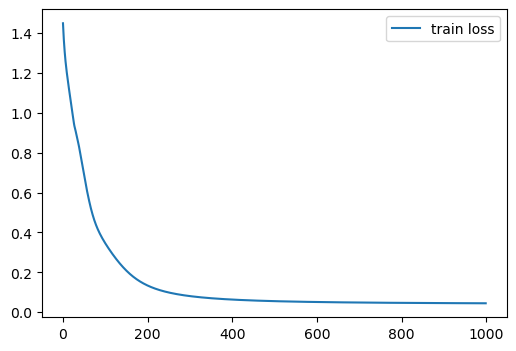

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(losses_train, label='train loss')
plt.legend()
plt.show()

Il est intéressant de visualiser également l'évolution du <b>loss sur l'ensemble de test</b>. Il faut alors ajouter les lignes de code adéquates.  
NB : il faut relancer la cellule de création du réseau de neurones et celle de l'optimiseur plus haut avant de relancer un nouvel apprentissage, car ses poids ont déjà été modifiés par l'apprentissage précédent. 

In [9]:
epochs = 1000
losses_train = []
losses_test = []

for epoch in range(epochs):
    y_pred = net(X_train)
    loss_train = criterion(y_pred, y_train)
    losses_train.append(loss_train.item())
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    y_pred = net(X_test)
    loss_test = criterion(y_pred, y_test)
    losses_test.append(loss_test.item())

    if epoch % 100 == 0:
        print(f'epoch: {epoch:2}  loss_train: {loss_train.item():10.8f} loss_test: {loss_test.item():10.8f}')

epoch:  0  loss_train: 0.04472766 loss_test: 0.09206659
epoch: 100  loss_train: 0.04406552 loss_test: 0.09224343
epoch: 200  loss_train: 0.04354452 loss_test: 0.09199343
epoch: 300  loss_train: 0.04312674 loss_test: 0.09136133
epoch: 400  loss_train: 0.04278719 loss_test: 0.09039903
epoch: 500  loss_train: 0.04250838 loss_test: 0.08917164
epoch: 600  loss_train: 0.04227750 loss_test: 0.08773116
epoch: 700  loss_train: 0.04208476 loss_test: 0.08612698
epoch: 800  loss_train: 0.04192283 loss_test: 0.08441301
epoch: 900  loss_train: 0.04178621 loss_test: 0.08264693


Si on veut visualiser l'évolution de la <b>précision (sur l'ensemble d'apprentissage et l'ensemble de test)</b>, il faut ajouter les lignes de code adéquates.  
NB : il faut relancer la cellule de création du réseau de neurones et celle de l'optimiseur plus haut avant de relancer un nouvel apprentissage, car ses poids ont déjà été modifiés par l'apprentissage précédent. 

In [ ]:
epochs = 1000
losses_train = []
losses_test = []
accuracies_train = []
accuracies_test = []

for epoch in range(epochs):
    y_pred_train = net(X_train)
    loss_train = criterion(y_pred_train, y_train)
    losses_train.append(loss_train.item())
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    y_pred_test = net(X_test)
    loss_test = criterion(y_pred_test, y_test)
    losses_test.append(loss_test.item())
        
    if epoch % 100 == 0:
        y_pred_train = torch.argmax(y_pred_train, dim=1)  #on prend l'indice du maximum (selon la 1ère dimension, càd pour chaque donnée)
        accuracy_train = (y_pred_train == y_train) #on compare les sorties predite et les sorties désirée,                                                        
        accuracy_train = accuracy_train.float()    #les résultats des tests sont True ou False donc on les convertit en float (-> 0. ou 1.)
        accuracy_train = accuracy_train.mean()     #on calcule la moyenne sur l'ensemble de test
        accuracy_train = accuracy_train.numpy()    #on convertit au format numpy car les variables sont du type torch ("tensor")
        accuracies_train.append(accuracy_train)

        accuracy_test = (torch.argmax(y_pred_test, dim=1) == y_test).float().mean().numpy() #idem que pour train mais en une seule ligne
        accuracies_test.append(accuracy_test)
        
        print(f'epoch: {epoch:2}  loss_train: {loss_train.item():10.8f} loss_test: {loss_test.item():10.8f}')
        print(f'accuracy_train: {accuracy_train:0.2f} accuracy_test: {accuracy_test:0.2f}')
            

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(losses_train, label='train loss')
plt.plot(losses_test, label='test loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(accuracies_train, label='train accuracy')
plt.plot(accuracies_test, label='test accuracy')
plt.legend()
plt.show()

#### <b>Evaluation sur l'ensemble de test</b>

In [ ]:
predict_out = net(X_test)
_, predict_y = torch.max(predict_out, 1)

print(f'accuracy on test set: {accuracy_score(y_test.data, predict_y.data):.2f}')

#### <b>Affichage graphique des résultats</b>

#### <b>Sauvegarde du modèle, pour utilisation ultérieure</b>

In [ ]:
torch.save(net.state_dict(), "model.pt")
print('model saved')
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

### <b>II.2) MLP avec données MNIST (en Pytorch)</b>

Pour les données MNIST, il existe des fonctions de chargement direct intégrées dans Torchvision.
Au premier lancement du programme, les données sont chargées d'Internet. Les fois suivantes, elles sont chargées d'un emplacement local.

#### <b>Importation des librairies nécessaires</b>

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#### <b>Chargement des données</b>

Dans PyTorch, les données sont chargées au moyen d'une fonction "DataLoader".    
Il faut l'utiliser pour les données d'apprentissage d'une part et pour les données de test d'autre part.  
Au moment du chargement des données, on peut leur appliquer un certain nombre de transformations, notamment :

- "Resize" : redimensionnement des images. Celui-ci est nécessaire si la taille des images est variable ou différente de la taille de la couche d'entrée du réseau.
- "Normalize : normalisation
- ...

On peut également faire de l'augmentation de données (rotation, translation, miroir, etc) par ce moyen.


In [ ]:
from torchvision import datasets

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))      #normalisation pour moyenne nulle et variance de 1
        ])

train_set = datasets.MNIST(root='.',
                                            train=True,            #sous-ensemble d'apprentissage
                                            transform=transform,
                                            download=True)         #charge d'Internet la première fois

test_set = datasets.MNIST(root='.',
                                            train=False,           #sous-esnemble de test
                                            transform=transform)

Dans le DataLoader, on définit également un certain nombre d'informations, notamment :
- "batch_size" : taille du batch, c'est à dire :
    - pour les données d'apprentissage, le nombre d'images présentées en entrée du réseau avant adaptation de ses poids par la règle d'apprentissage
    - pour les données de test, le nombre d'images présentées en entrée du réseau avant calcul du taux de reconnaissance ("Accuracy")
- "shuffle" : mélange aléatoire des images avant tirage (ou pas)
- etc.  

Ici, on choisit de mélanger les données d'apprentissage mais pas les données de test.

In [ ]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                          batch_size=batch_size,
                                          shuffle=False)

"""
#si on veut réduire le dataset
list1 = list(range(0, int(len(train_dataset)/10)))
list2 = list(range(0, int(len(test_dataset)/10)))

train_subset = torch.utils.data.Subset(train_dataset, list1)
test_subset = torch.utils.data.Subset(test_dataset, list2)

train_loader = torch.utils.data.DataLoader(dataset=train_subset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_subset,
                                          batch_size=batch_size, 
                                          shuffle=False)
"""

print(len(train_loader.dataset))
print(len(test_loader.dataset))

#### <b>Création du réseau de neurones</b>

En première approche, on choisit une structure simple composée de 2 couches convolutives.

In [ ]:
im_w, im_h = 28, 28   #taille des images
nb_cl = 10            #nombre de classes

class MLP_MNIST(nn.Module):
    def __init__(self):
        super(MLP_MNIST, self).__init__()
        self.fc_h1 = nn.Linear(im_w*im_h, 100)
        self.fc_out = nn.Linear(100, nb_cl)      
    def forward(self, x):
        x = x.view(-1, im_w*im_h)
        x = F.relu(self.fc_h1(x))
        out = self.fc_out(x)
        return out

model = MLP_MNIST().to(device)      #creation du modele

print(model)

from torchsummary import summary
summary(model, input_size=(1, im_w*im_h), device='cpu')

#### <b>Fonction de coût ("loss") et optimiseur ("optimizer")</b>

Pour l'apprentissage, on doit choisir la fonction de coût (loss) à utiliser. Il en existe différents types.
Il existe également plusieurs type d'optimiseurs. L'optimiseur est l'algorithme permettant de réduire le loss à chaque itération d'apprentissage.
Parmi les paramètres d'apprentissage, on trouve le taux d'apprentissage (learning rate), qui ajuste la quantité de modification des poids du réseau de neurones à chaque itération d'apprentissage.

In [ ]:
learning_rate = 0.01

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adadelta(model.parameters(), lr=learning_rate)

#### <b>Fonction d'apprentissage</b>

On écrit une fonction d'apprentissage pour les boucles sur les batchs d'images.
Rappel de l'algorithme d'apprentissage :  

- présentation d'un batch d'images d'apprentissage en entrée du réseau
- calcul des sorties correspondantes du réseau
- calcul de l'erreur de sortie
- modification des poids du réseau de neurones en fonction de cette erreur, de la dernière couche à la première (*)

(*)"rétro-propagation du gradient de l'erreur"

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0.0
    correct = 0
    data_len = len(train_loader.dataset)
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)         # calcul de l'erreur de sortie
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0:
            print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), data_len, loss.item()))
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)          # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()  
    train_loss /= data_len
    accuracy = 100. * correct / len(train_loader.dataset)
    print('Train Epoch: {} [{}/{}]\tLoss: {:.4f}\tTrain accuracy: {:.4f}'.format(
                epoch, batch_idx * len(data), data_len, loss.item(), accuracy))
    return train_loss, accuracy

#### <b>Fonction de test</b>

La fonction de test réalise l'activation du réseau de neurones (c'est à dire de ses couches, de la première à la dernière), mais cette fois-ci sans appliquer l'apprentissage. Cela permet de comparer sa sortie réelle à la sortie désirée, afin d'évaluer ses performances.

In [2]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)         # calcul de l'erreur
            test_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Test accuracy: ({:.2f}%)\n'.format(test_loss, accuracy))
    return test_loss, accuracy

On peut alors lancer la boucle d'apprentissage sur les époques.  
Le fait de faire le test à chaque itération de cette boucle permet d'obtenir le loss et l'accuracy sur les données de test (dans le but de voir leur évolution au fil des itérations).

In [3]:
epochs = 20

test_losses, test_accuracies, train_losses, train_accuracies = [], [], [], []
print('Learning (please wait)...')
for epoch in range(1, epochs + 1):
    train_loss, train_accuracy = train(model, device, train_loader, optimizer, epoch)
    test_loss, test_accuracy = test(model, device, test_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
print('Done')

Learning (please wait)...


NameError: name 'train' is not defined

#### <b>Sauvegarde du modèle pour utilisation extérieure</b>

On peut sauvegarder le modèle, pour utilisation ultérieure.

In [4]:
torch.save(model.state_dict(), "model_MNIST.pt")            # Save the model checkpoint
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

NameError: name 'torch' is not defined

#### <b>Affichage graphique du loss et du taux de reconnaissance sur les données d'apprentissage et de test</b>

Il est toujours intéressant d'afficher graphiquement la progression de l'apprentissage, notamment la précision sur les données d'apprentissage et sur les données de test.


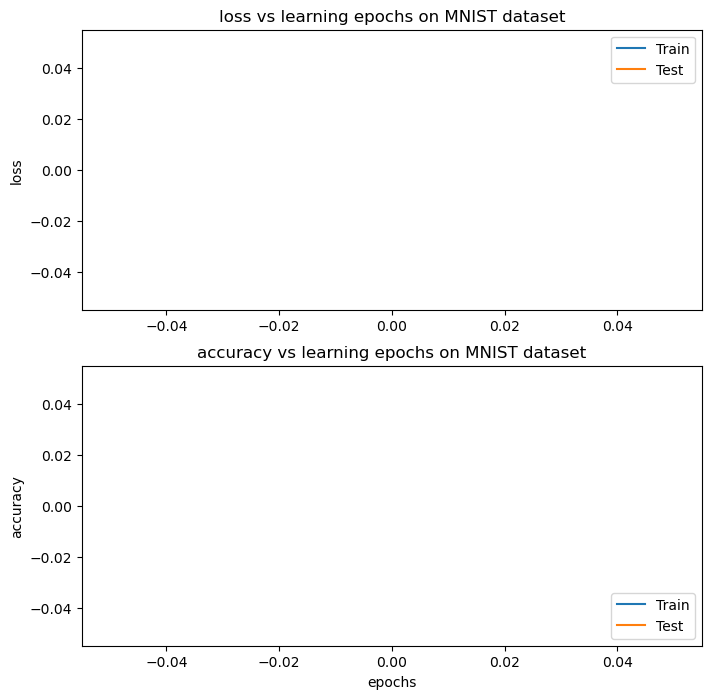

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)

plt.title("loss vs learning epochs on MNIST dataset")
plt.ylabel("loss")
plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test')
plt.legend(loc="upper right")
plt.subplot(2, 1, 2)

plt.title("accuracy vs learning epochs on MNIST dataset")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.legend(loc="lower right")
plt.show()

Une analyse rapide de ces résultats montre que la précision sur les données de test est très bonne dès les premières époques d'apprentissage, malgré la simplicité du modèle. 

#### <b>Utilisation ultérieure : chargement du modèle généré précédemment et inférence</b>

Par inférence, on entend la présentation d'une image en entrée du modèle et le calcul de la prédiction de ce dernier.  
L'utilisation du réseau de neurones en inférence consiste à charger le fichier-modèle, puis l'application à des images de test.  

Remarque : pour être sûr que le modèle présent en mémoire soit celui qui est chargé du fichier, il faut redémarrer le noyau du Notebook.  
Dans ce cas, il faut relancer relancer une partie du code défini plus haut. Plus précisément :

- Importation des librairies nécessaires
- Définition de la structure du réseau de neurones ainsi que son flot d'information
- Création d'un réseau de neurones et adaptation au processeur utilisé

Pour le test, on peut récupérer une image PNG directement du github suivant :

https://github.com/Paperspace/mnist-sample/

In [6]:
!cp example5.png test.png

cp: cannot stat 'example5.png': No such file or directory


In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict(model, image):
    image = image.resize((im_w, im_h))
    np_img = np.array(image)                        # conversion en tableau numpy
    image_tensor = torch.from_numpy(np_img)         # conversion en tenseur PyTorch
    print(image_tensor.shape)
    image_tensor = image_tensor.reshape([1, 1, np_img.shape[0], np_img.shape[1]]) # ajout d'une dimension
    output = model(image_tensor.float())            # application de l'image en entrée du réseau
    #index = output.data.cpu().numpy().argmax()
    index = output.data.numpy().argmax()
    return index

#programme principal
path = './'
image_file = 'test.png'
true_index = 5

device = 'cpu' 

model = MLP_MNIST().to(device)      #creation d'un nouvelle instance du modele

model.load_state_dict(torch.load('model_MNIST.pth'))    # chargement des poids sauvegardés précédemment

img = Image.open(path + image_file)
img = img.convert('L')               #conversion en monochrome
index = predict(model, img)
print('indice classe estimée : ', index)

#affichage du résultat sur l'image
classe = [i for i in range(10)]    #nom des classes
print('classes : ', classe)
if(true_index == index):
    res = True
else:
    res = False
plt.title('classe : ' + str(classe[index]) + ' (' + str(res) + ')')
plt.axis('off')
plt.imshow(img)

NameError: name 'MLP_MNIST' is not defined

### <b>II.3) MLP avec données GTSRB (en Pytorch) (Exercice 3.3)</b> 

Idem exercice 3.1 mais en Pytorch.


#### <b>Importation des librairies nécessaires</b>

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")


#### <b>Chargement des données</b>

Le système de DataLoader de Pytorch permet de charger les données depuis un emplacement local. Il existe également une fonction "random_split()" permettant de séparer un ensemble de données en deux sous-ensembles (apprentissage/test).  
La solution la plus simple consiste donc à ne charger que les données d'apprentissage, puis de les séparer en deux.

In [2]:
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms

im_w, im_h = 32, 32  #on peut mettre ce qu'on veut comme taille des images, mais garder à peu les proportions d'origine

train_dir = 'data/GTSRB/Final_Training/Images/'

transform = transforms.Compose([
                                transforms.Resize((im_w, im_h)),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor(),   #car la transformation qui suit porte sur des tenseurs
                               ])

full_dataset = datasets.ImageFolder(train_dir, transform=transform)

#split dataset for train/test
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, test_size])

print(len(full_dataset))
print(len(train_dataset))
print(len(val_dataset))

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

39209
31367
7842


Compléter cet exemple avec les différentes étapes suivantes (en utilisant des cellules séparées pour faciliter le test) :

- définition de la structure du réseau de neurones ainsi que son flot d'information
- création d'un réseau de neurones et adaptation au processeur utilisé
- paramétrage de l'apprentissage et du test
- fonction d'apprentissage
- fonction de test
- boucle d'apprentissage
- affichage graphique du loss et du taux de reconnaissance sur les données d'apprentissage et de test
- sauvegarde du modèle
- utilisation ultérieure : chargement du modèle généré précédemment et inférence
- amélioration de la précision

Remarque : dans un premier temps, on utilisera pour le réseau de neurones la structure simple déjà utilisée avec Keras, pour ne pas avoir des durées d'apprentissage trop longues.

#### <b>Définition de la structure du réseau de neurones ainsi que son flot d'information</b>

On peut reprendre la structure générale du réseau de neurones déjà utilisé avec MNIST, mais il faut adapter le nombre de classes.

In [3]:
im_w, im_h = 28, 28   #taille des images
nb_cl = 43            #nombre de classes

class MLP_GTSRB(nn.Module):
    def __init__(self):
        super(MLP_GTSRB, self).__init__()
        self.fc_h1 = nn.Linear(im_w*im_h, 100)
        self.fc_out = nn.Linear(100, nb_cl)      
    def forward(self, x):
        x = x.view(-1, im_w*im_h)
        x = F.relu(self.fc_h1(x))
        out = self.fc_out(x)
        return out



#### <b>Création d'un réseau de neurones et adaptation au processeur utilisé</b>

In [4]:
model = MLP_GTSRB().to(device)      #creation du modele

print(model)

from torchsummary import summary
summary(model, input_size=(1, im_w*im_h), device='cpu')

MLP_GTSRB(
  (fc_h1): Linear(in_features=784, out_features=100, bias=True)
  (fc_out): Linear(in_features=100, out_features=43, bias=True)
)
Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            78,500
├─Linear: 1-2                            4,343
Total params: 82,843
Trainable params: 82,843
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            78,500
├─Linear: 1-2                            4,343
Total params: 82,843
Trainable params: 82,843
Non-trainable params: 0

#### <b>Paramétrage de l'apprentissage et du test</b>

#### <b>Fonction d'apprentissage</b>

#### <b>Fonction de test</b>

#### <b>Boucle d'apprentissage</b>

#### <b>Affichage graphique du loss et du taux de reconnaissance sur les données d'apprentissage et de test</b>

#### <b>Sauvegarde du modèle</b>

Ce format de sauvegarde comporte les poids du réseau de neurones, mais également les paramètres d'apprentissage, les valeurs du loss, etc.
Ce fichier peut donc servir de base à la reprise de l'apprentissage. On parle alors de checkpoint.

#### <b>Utilisation ultérieure : chargement du modèle généré précédemment et inférence</b>

Par inférence, on entend la présentation d'une image en entrée du modèle et le calcul de la prédiction de ce dernier.  
L'utilisation du réseau de neurones en inférence consiste à charger le fichier-modèle, puis à l'appliquer à des images de test.  
Remarque : pour être sûr que le modèle présent en mémoire soit celui qui est chargé du fichier, il faut redémarrer le noyau du Notebook.  
Dans ce cas, il faut relancer une partie du code défini plus haut. Plus précisément :
- Importation des librairies nécessaires
- Définition de la structure du réseau de neurones ainsi que son flot d'information
- Création d'un réseau de neurones et adaptation au processeur utilisé

On affichera l'image avec pour titre la classe réelle et la classe estimée.

On peut également vouloir faire un test sur toute la base de test.
Dans ce cas il faut exécuter en plus :

- le chargement des données
- la fonction de test
- le paramétrage du test

#### <b>Amélioration de la précision</b>

Pour essayer d'améliorer la précision du réseau de neurones (accuracy), on pourra jouer sur :

- la taille des images (actuellement redimensionnées à 32x32)
- la structure du réseau de neurones (nombre de couches cachées, nombre de neurones dans les couches)
- l'ajout de dropout
- la normalisation des données

L'objectif est d'atteindre une précision de <b>94%</b> avec un modèle possédant <b>moins de 500000 paramètres</b>.  
On pourra ne donner que les modifications dans la (ou les) cellule(s) ci-dessous ; il faudra alors relancer les cellules adéquates ci-dessus.

## <b>Références</b>

-  github yangzhangalmo :
https://github.com/yangzhangalmo/pytorch-iris

- Iris Flowers Classification with PyTorch :
https://gist.github.com/BlackChesire/6c62ba0281166a6b16e0abf288e1a399

- Iris Flowers Classification with PyTorch :
https://medium.com/@ozgur.ersoz3/iris-flowers-classification-with-pytorch-cd80c8aeeb2c

- Classifying the Iris Data Set with PyTorch :
https://janakiev.com/blog/pytorch-iris/

- Simple Iris Dataset Classification Using PyTorch :
https://www.kaggle.com/code/mohitchaitanya/simple-iris-dataset-classification-using-pytorch

- PyTorch — Logistic Regression on Iris dataset :
https://blog.jovian.ai/torch-logistic-regression-on-iris-dataset-d966b23339da

- Image processing with numpy :
https://pythoninformer.com/python-libraries/numpy/numpy-and-images/

- How to Train an Image Classifier in PyTorch and use it to Perform Basic Inference on Single Images :
https://towardsdatascience.com/how-to-train-an-image-classifier-in-pytorch-and-use-it-to-perform-basic-inference-on-single-images-99465a1e9bf5

- How To Save and Load Model In PyTorch With A Complete Example :
https://towardsdatascience.com/how-to-save-and-load-a-model-in-pytorch-with-a-complete-example-c2920e617dee
